<a href="https://colab.research.google.com/github/jyothish-mohan/GAN_Tensorflow_Mnist/blob/main/GAN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [3]:
(X_train,y_train),(_,_) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_train = (X_train - 127.5) / 127.5

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(256)

In [7]:
def generator_model():
  model = keras.Sequential()
  model.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7,7,256)))

  model.add(layers.Conv2DTranspose(128,(5,5), strides=(1,1), padding="same", use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU()) # after this the shape will be --> (7,7,128)

  model.add(layers.Conv2DTranspose(64,(5,5), strides=(2,2), padding="same", use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU()) # after this the shape will be --> (14,14,64)

  model.add(layers.Conv2DTranspose(1,(5,5), strides=(2,2), padding="same", use_bias=False,activation='tanh')) # after this the shape will be --> (28,28,1)
  return model

In [8]:
def discriminator_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(64,(5,5), strides=(2,2), padding='same', input_shape = [28,28,1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5), strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

In [9]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [10]:
def discriminator_loss(real,fake):
  real_loss = loss(tf.ones_like(real),real)
  fake_loss = loss(tf.zeros_like(fake),fake)
  total_loss = real_loss + fake_loss
  return total_loss

In [11]:
def generator_loss(fake):
  return loss(tf.ones_like(fake),fake)

In [12]:
generator = generator_model()
discriminator = discriminator_model()

In [13]:
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

In [31]:
epochs = 10
noise_dim = 100
batch_size = 256

In [36]:
for epoch in range(epochs):
  for idx,real in enumerate(train_ds):
    noise = tf.random.normal([batch_size,noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise,training = True)

      real_output = discriminator(real)
      fake_output = discriminator(generated_images)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output,fake_output)

    gen_gradients = gen_tape.gradient(gen_loss,generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    gen_opt.apply_gradients(zip(gen_gradients,generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradients,discriminator.trainable_variables))

    if epoch % 100 == 0:
      img = tf.keras.preprocessing.image.array_to_img(generated_images[0])
      img.save("drive/MyDrive/Images/GAN/gen_{}.jpg".format(epoch))

In [47]:
import os
output_images = []
out_names = []
for img in os.listdir("drive/MyDrive/Images/GAN"):
  image = os.path.join("drive/MyDrive/Images/GAN",img)
  out_names.append(image)
  image = tf.keras.preprocessing.image.load_img(image)
  output_images.append(image)

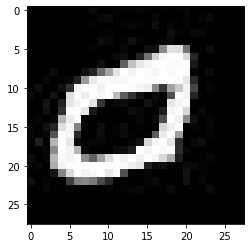

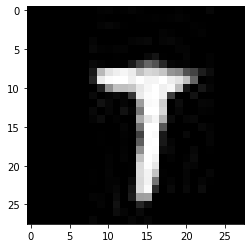

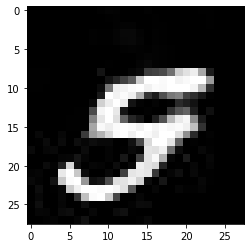

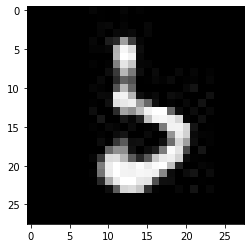

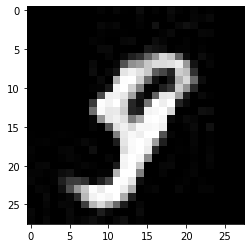

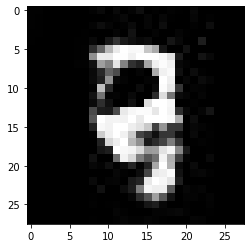

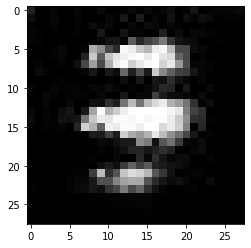

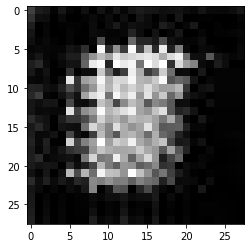

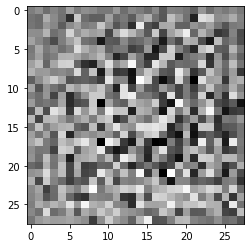

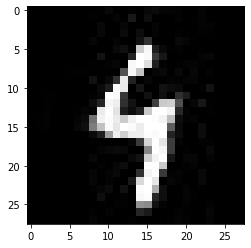

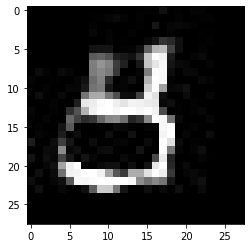

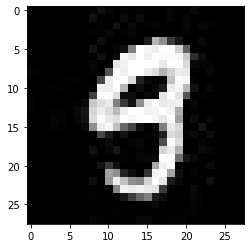

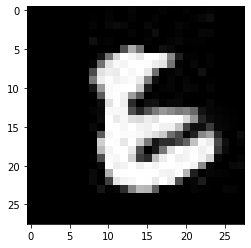

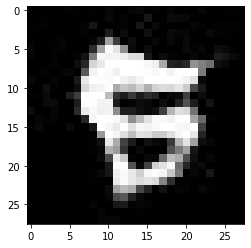

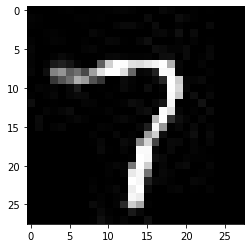

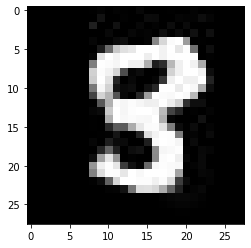

In [52]:
for i in output_images:
  plt.imshow(i)
  plt.show()